# Distribución de casos COVID-19 por municipios (Catalunya).

Datos obtenidos de https://analisi.transparenciacatalunya.cat/


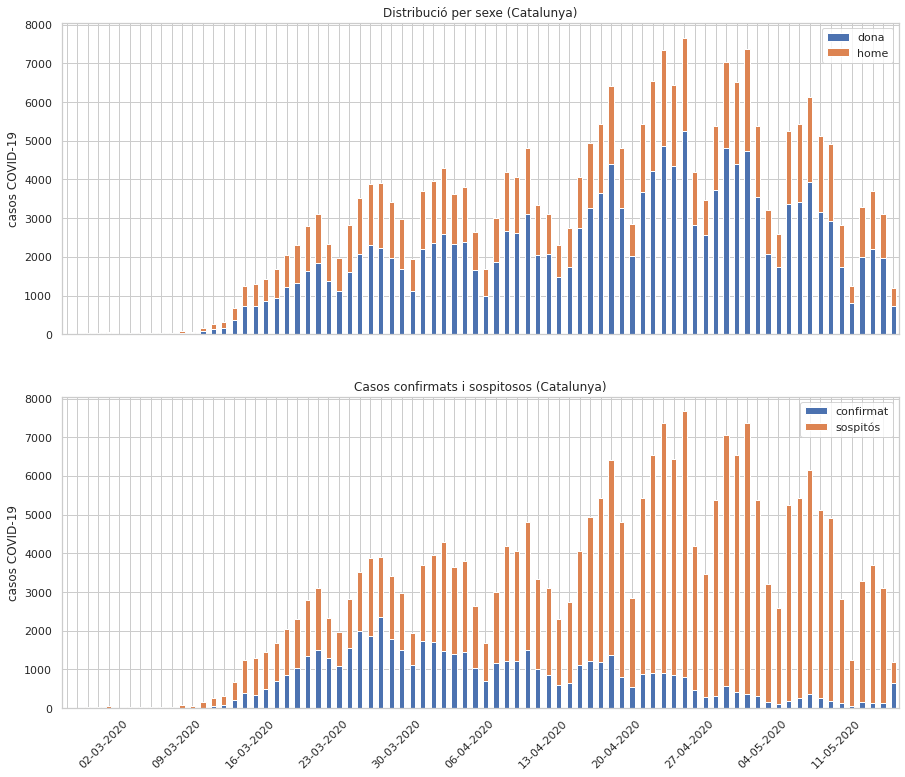

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import datetime

# Requiere pip install sodapy
from sodapy import Socrata

%matplotlib inline
sns.set()
sns.set(style='whitegrid')

plt.clf()
plt.cla()
plt.close()

# Asigne el nombre oficial del municipio (en catalán y con los acentos pertinentes) al campo población.
# Para obrener los datos generales de Catalunya, asigne una cadena vacía.
poblacion = ""

condicion_poblacion = f"municipidescripcio = '{ poblacion }'" if poblacion else ""
titulo_poblacion = f"{ poblacion }" if poblacion else "Catalunya"

client = Socrata("analisi.transparenciacatalunya.cat", None)
results = client.get(
    "jj6z-iyrp",
     select="data, sexedescripcio, resultatcoviddescripcio, sum(numcasos) as numcasos",
     group="data, sexedescripcio, resultatcoviddescripcio",
     where=f"{ condicion_poblacion }"
)

df = pd.DataFrame.from_records(results)
df['dona'] = df[(df['sexedescripcio'] == 'Dona')]['numcasos'].astype('int64')
df['home'] = df[(df['sexedescripcio'] == 'Home')]['numcasos'].astype('int64')
df['sospitós'] = df[(df['resultatcoviddescripcio'] == 'Sospitós')]['numcasos'].astype('int64')
df['confirmat'] = df[(df['resultatcoviddescripcio'] == 'Positiu')]['numcasos'].astype('int64')
df.reset_index() 
df.index = pd.to_datetime(df['data'].str[:10], format='%Y-%m-%d')

nrow = 2
ncol = 1

figura, ejes = plt.subplots(nrow, ncol, figsize=(15,7 * nrow))

def format_date(value, pos=None):
    fecha = df_plot.iloc[value:value+1].index.date
    dia = pd.Timestamp(fecha[0]).dayofweek
    if (dia == 0):
        return fecha[0].strftime("%d-%m-%Y")
    else:
        return ''

fila = 0

df_plot = pd.DataFrame()
df_plot['dona'] = df['dona'].groupby(['data']).sum()
df_plot['home'] = df['home'].groupby(['data']).sum()
ejes[fila] = df_plot.plot(kind='bar', ax=ejes[fila], stacked=True, title=f"Distribució per sexe ({ titulo_poblacion })")
ejes[fila].xaxis.set_major_formatter(ticker.FuncFormatter(format_date))
ejes[fila].set_xlabel('')
ejes[fila].set_ylabel('casos COVID-19')

fila = 1

df_plot = pd.DataFrame()
df_plot['confirmat'] = df['confirmat'].groupby(['data']).sum()
df_plot['sospitós'] = df['sospitós'].groupby(['data']).sum()
ejes[fila] = df_plot.plot(kind='bar', ax=ejes[fila], stacked=True, title=f"Casos confirmats i sospitosos ({ titulo_poblacion })")
ejes[fila].xaxis.set_major_formatter(ticker.FuncFormatter(format_date))
ejes[fila].set_xlabel('')
ejes[fila].set_ylabel('casos COVID-19')

figura.autofmt_xdate(rotation=45) 


# Distribución de casos COVID-19 en Catalunya (positivos, altas hostitalárias y defunciones).

Datos obtenidos de https://analisi.transparenciacatalunya.cat/


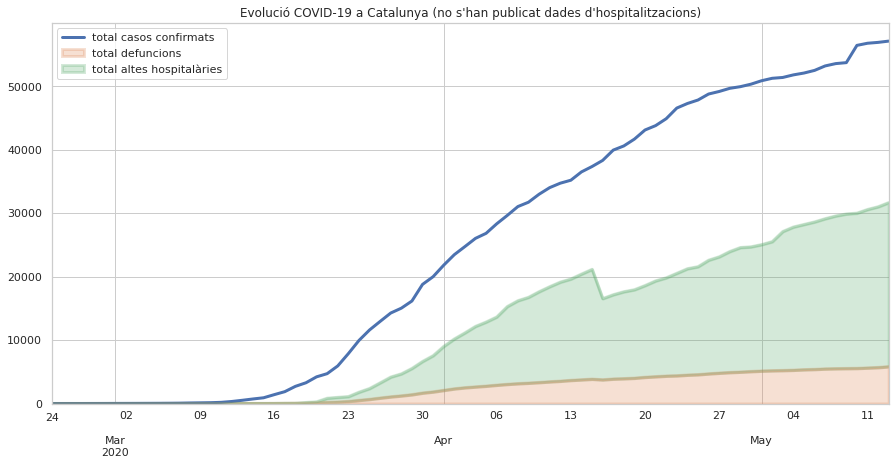

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import datetime

# Requiere pip install sodapy
from sodapy import Socrata

%matplotlib inline
sns.set()
sns.set(style='whitegrid')

plt.clf()
plt.cla()
plt.close()

client = Socrata("analisi.transparenciacatalunya.cat", None)
results = client.get("623z-r97q")

df = pd.DataFrame.from_records(results)
df.fillna(0, inplace=True)

df_plot = pd.DataFrame()


df_plot['data'] = df['data']
df_plot['total casos confirmats'] = df['total_casos_confirmats'].astype('int64')
df_plot['total defuncions'] = df['total_defuncions'].astype('int64')
df_plot['total altes hospitalàries'] = df['total_altes_hospital_ries'].astype('int64')
df_plot.reset_index() 
df_plot.index = pd.to_datetime(df_plot['data'].str[:10], format='%Y-%m-%d')


figura, ejes = plt.subplots(figsize=(15, 7))
df_plot[['total casos confirmats']].plot(ax=ejes, label='Total casos confirmats', lw=3)
df_plot[['total defuncions', 'total altes hospitalàries']].plot.area(ax=ejes, stacked=True, alpha=0.25, lw=3, title="Evolució COVID-19 a Catalunya (no s'han publicat dades d'hospitalitzacions)")
ejes.set_xlabel('')
plt.show()